# Kaiser Bessel-Derived Window

$$
w[n] = 0.402
 − 0.498 \cos\bigg(\frac{2 \pi n}{N - \mathrm{1}_{symmetric}}\bigg)
 + 0.098 \cos\bigg(\frac{4 \pi n}{N - \mathrm{1}_{symmetric}}\bigg)
 − 0.001 \cos\bigg(\frac{6 \pi n}{N - \mathrm{1}_{symmetric}}\bigg)
$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as dsp
from scipy import fft
import IPython.display as display
from zplot import zplot
from compare import compare

In [2]:
def dsp_windows_kaiser_bessel_derived(N, sym=False):
    return dsp.windows.kaiser_bessel_derived(N, 0.5, sym=sym)

In [3]:
def kaiserbessel(N, sym=None):
    """
    Return a Kaiser window derived from a Bessel function.

    Args:
        N: Number of points in the output window. 
        If zero or less, an empty array is returned.

    Returns:
        the Kaiser window of length N with given symmetry

    """
    n = np.arange(N)
    N = N - sym
    return (0.402
        - 0.498 * np.cos(2 * np.pi * n / N)
        + 0.098 * np.cos(4 * np.pi * n / N)
        - 0.001 * np.cos(6 * np.pi * n / N)
    )

This window is only defined for even and symmetric configurations.

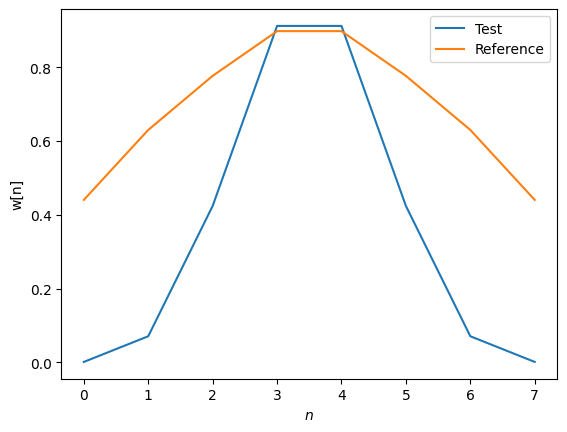

In [4]:
test, reference = compare(8, kaiserbessel, dsp_windows_kaiser_bessel_derived, True)

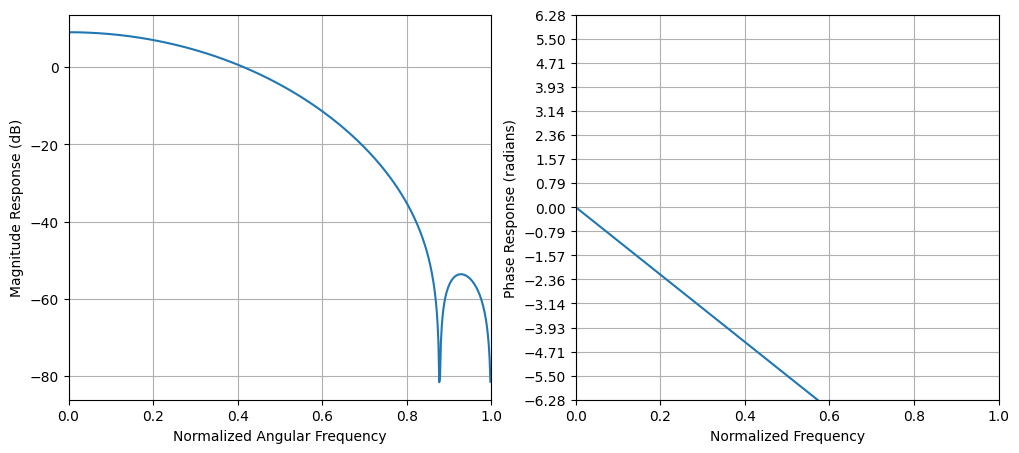

In [5]:
_ = dsp.freqz(test, plot=zplot)

In [6]:
list(test)

[0.0010000000000000295,
 0.07059599601453428,
 0.4238969862539488,
 0.9120070177315169,
 0.9120070177315169,
 0.4238969862539489,
 0.07059599601453435,
 0.0010000000000000295]

In [7]:
list(reference)

[0.44029637806158717,
 0.6300127602060897,
 0.776584780933482,
 0.8978524931556675,
 0.8978524931556675,
 0.776584780933482,
 0.6300127602060897,
 0.44029637806158717]

## Coherent Gain

In [8]:
kaiserbessel(1024, False).mean()

0.402

## Side-lobe amplitude

-65.37495373816012

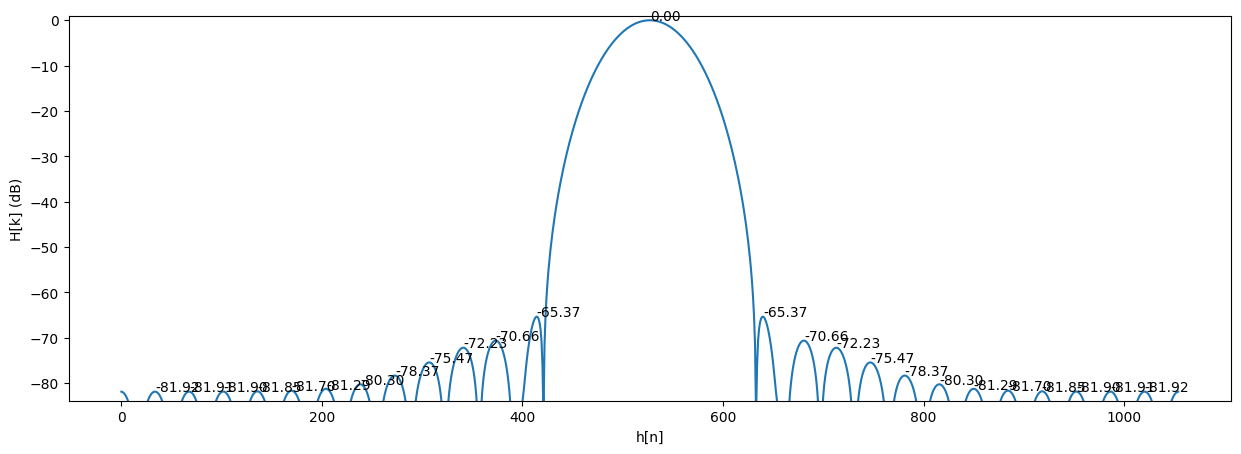

In [9]:
w = kaiserbessel(31, False)
w = np.pad(w, (512, 512))
H = fft.fft(w)
H = fft.fftshift(H)
H = 20 * np.log10(np.abs(H) + 1e-12)
H = H - H.max()
peaks, _ = dsp.find_peaks(H)
ymin = H[peaks[len(peaks)//2:]][-1] - 1
plt.figure(figsize=(15, 5))
plt.plot(H)
for x, y in zip(peaks, H[peaks]):
    if y > ymin:
        plt.text(x, y, f'{y:.2f}')
plt.ylabel('H[k] (dB)')
plt.xlabel('h[n]')
plt.ylim(ymin - 1, 1)
sorted(H[peaks], reverse=True)[1]